In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
#################### COMPARE RADIAL DISTRIBUTION OF VEER  #####################
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fileName = 'veer_Rdistr.txt'


dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"



In [3]:
#%% Extract radial distribution of veer
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',') 
r3_incr_26 = file_26[:,0]
u3_26 = file_26[:,1:] # mean, 97.5th, 2.5th max
file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',')
r3_incr_28 = file_28[:,0]
u3_28 = file_28[:,1:] # mean, 97.5th, 2.5th max
file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',')
r3_incr_30 = file_30[:,0]
u3_30 = file_30[:,1:] # mean, 97.5th, 2.5th max
file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',')
r3_incr_32 = file_32[:,0]
u3_32 = file_32[:,1:] # mean, 97.5th, 2.5th max
file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',')
r3_incr_34 = file_34[:,0]
u3_34 = file_34[:,1:] # mean, 97.5th, 2.5th max

In [4]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_34]


In [5]:
#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


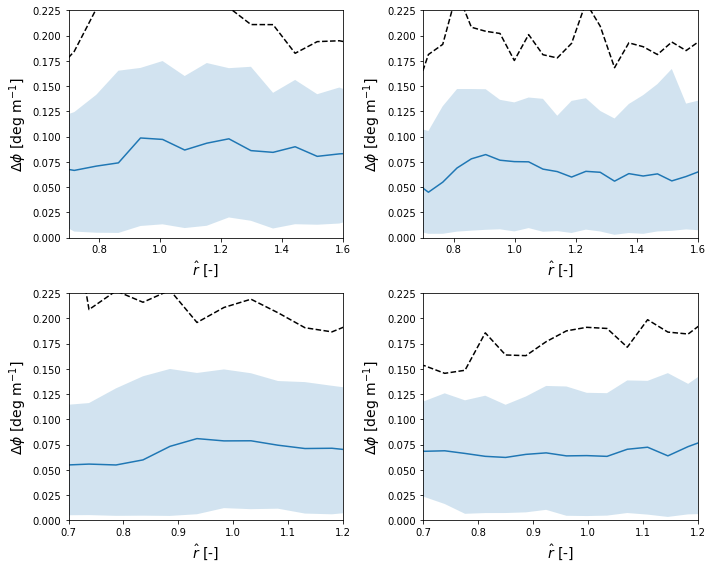

In [6]:
#%% Figure showing radial distribution of veer

mpyplot.figure(figsize=(10,8))
# 26 dec C
mpyplot.subplot(2,2,1)
mpyplot.plot(r3_incr_26/r_eye_26,u3_26[:,0],label='3-sec')
mpyplot.fill(np.concatenate([r3_incr_26,np.flip(r3_incr_26)])/r_eye_26,np.concatenate([u3_26[:,1],np.flip(u3_26[:,2])]),alpha=0.2)
mpyplot.plot(r3_incr_26/r_eye_26,u3_26[:,-1],'--k')
mpyplot.xlim(0.7,1.6)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'$\Delta \phi$ [deg m$^{-1}$]',fontsize=14)
# 28 dec C
mpyplot.subplot(2,2,2)
mpyplot.plot(r3_incr_28/r_eye_28,u3_28[:,0],label='3-sec')
mpyplot.fill(np.concatenate([r3_incr_28,np.flip(r3_incr_28)])/r_eye_28,np.concatenate([u3_28[:,1],np.flip(u3_28[:,2])]),alpha=0.2)
mpyplot.plot(r3_incr_28/r_eye_28,u3_28[:,-1],'--k')
mpyplot.xlim(0.7,1.6)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'$\Delta \phi$ [deg m$^{-1}$]',fontsize=14)
# 30 dec C
mpyplot.subplot(2,2,3)
mpyplot.plot(r3_incr_30/r_eye_30,u3_30[:,0],label='3-sec')
mpyplot.fill(np.concatenate([r3_incr_30,np.flip(r3_incr_30)])/r_eye_30,np.concatenate([u3_30[:,1],np.flip(u3_30[:,2])]),alpha=0.2)
mpyplot.plot(r3_incr_30/r_eye_30,u3_30[:,-1],'--k')
mpyplot.xlim(0.7,1.2)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'$\Delta \phi$ [deg m$^{-1}$]',fontsize=14)
# 32 dec C
mpyplot.subplot(2,2,4)
mpyplot.plot(r3_incr_32/r_eye_32,u3_32[:,0],label='3-sec')
mpyplot.fill(np.concatenate([r3_incr_32,np.flip(r3_incr_32)])/r_eye_32,np.concatenate([u3_32[:,1],np.flip(u3_32[:,2])]),alpha=0.2)
mpyplot.plot(r3_incr_32/r_eye_32,u3_32[:,-1],'--k')
mpyplot.xlim(0.7,1.2)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'$\Delta \phi$ [deg m$^{-1}$]',fontsize=14)

mpyplot.tight_layout()
mpyplot.show()

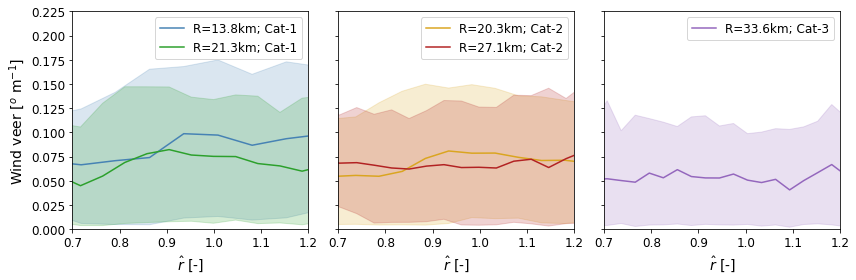

In [14]:
#%% Figure per category
mpyplot.figure(figsize=(12,4))
## Cat-1
mpyplot.subplot(1,3,1)
# mpyplot.title('Category-1')
# 26C
mpyplot.plot(r3_incr_26/r_eye_26,u3_26[:,0],color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.fill(np.concatenate([r3_incr_26,np.flip(r3_incr_26)])/r_eye_26,np.concatenate([u3_26[:,1],np.flip(u3_26[:,2])]),alpha=0.2,color=col_26)
# 28C
mpyplot.plot(r3_incr_28/r_eye_28,u3_28[:,0],color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.fill(np.concatenate([r3_incr_28,np.flip(r3_incr_28)])/r_eye_28,np.concatenate([u3_28[:,1],np.flip(u3_28[:,2])]),alpha=0.2,color=col_28)
# Labels and limits
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(0.7,1.2)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'Wind veer [deg m$^{-1}$]',fontsize=14)
mpyplot.ylabel(r'Wind veer [$^{o}$ m$^{-1}$]',fontsize=14)
mpyplot.legend(fontsize=12)

## Cat-2
mpyplot.subplot(1,3,2)
# mpyplot.title('Category-2')
# 30C
mpyplot.plot(r3_incr_30/r_eye_30,u3_30[:,0],color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.fill(np.concatenate([r3_incr_30,np.flip(r3_incr_30)])/r_eye_30,np.concatenate([u3_30[:,1],np.flip(u3_30[:,2])]),alpha=0.2,color=col_30)
# 32C
mpyplot.plot(r3_incr_32/r_eye_32,u3_32[:,0],color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.fill(np.concatenate([r3_incr_32,np.flip(r3_incr_32)])/r_eye_32,np.concatenate([u3_32[:,1],np.flip(u3_32[:,2])]),alpha=0.2,color=col_32)
# Labels and limits
mpyplot.ylim(0,0.225)
mpyplot.xticks(fontsize=12)
locs,labs = mpyplot.yticks(fontsize=12)
mpyplot.yticks(locs,'',fontsize=12)
mpyplot.ylim(0,0.225)
mpyplot.xlim(0.7,1.2)
mpyplot.ylim(0,0.225)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.legend(fontsize=12)

## Cat-3
mpyplot.subplot(1,3,3)
# mpyplot.title('Category-3')
# 34C
mpyplot.plot(r3_incr_34/r_eye_34,u3_34[:,0],color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
mpyplot.fill(np.concatenate([r3_incr_34,np.flip(r3_incr_34)])/r_eye_34,np.concatenate([u3_34[:,1],np.flip(u3_34[:,2])]),alpha=0.2,color=col_34)
# Labels and limits
mpyplot.ylim(0,0.225)
mpyplot.xticks(fontsize=12)
locs,labs = mpyplot.yticks(fontsize=12)
mpyplot.yticks(locs,'',fontsize=12)
mpyplot.ylim(0,0.225)
mpyplot.xlim(0.7,1.2)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.legend(fontsize=12)

mpyplot.tight_layout()

mpyplot.savefig(dirFig + "veer.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
mpyplot.show()


In [8]:
print(np.nanmean(u3_26[(r3_incr_26/r_eye_26>=0.7) & (r3_incr_26/r_eye_26<=1.2),0]))
print(np.nanmean(u3_28[(r3_incr_28/r_eye_28>=0.7) & (r3_incr_28/r_eye_28<=1.2),0]))
print(np.nanmean(u3_30[(r3_incr_30/r_eye_30>=0.7) & (r3_incr_30/r_eye_30<=1.2),0]))
print(np.nanmean(u3_32[(r3_incr_32/r_eye_32>=0.7) & (r3_incr_32/r_eye_32<=1.2),0]))
print(np.nanmean(u3_34[(r3_incr_34/r_eye_34>=0.7) & (r3_incr_34/r_eye_34<=1.2),0]))


0.08396607135134478
0.06814490535878753
0.06980661261647594
0.0665045477330423
0.053413817456038036


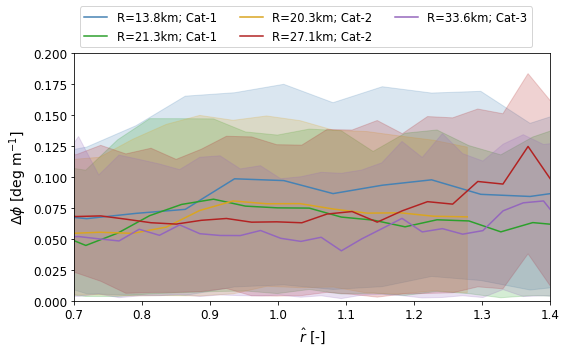

In [9]:
#%% Figure per category
mpyplot.figure(figsize=(8,5))
# 26C
mpyplot.plot(r3_incr_26/r_eye_26,u3_26[:,0],color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.fill(np.concatenate([r3_incr_26,np.flip(r3_incr_26)])/r_eye_26,np.concatenate([u3_26[:,1],np.flip(u3_26[:,2])]),alpha=0.2,color=col_26)
# 28C
mpyplot.plot(r3_incr_28/r_eye_28,u3_28[:,0],color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.fill(np.concatenate([r3_incr_28,np.flip(r3_incr_28)])/r_eye_28,np.concatenate([u3_28[:,1],np.flip(u3_28[:,2])]),alpha=0.2,color=col_28)
# 30C
mpyplot.plot(r3_incr_30/r_eye_30,u3_30[:,0],color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.fill(np.concatenate([r3_incr_30,np.flip(r3_incr_30)])/r_eye_30,np.concatenate([u3_30[:,1],np.flip(u3_30[:,2])]),alpha=0.2,color=col_30)
# 32C
mpyplot.plot(r3_incr_32/r_eye_32,u3_32[:,0],color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.fill(np.concatenate([r3_incr_32,np.flip(r3_incr_32)])/r_eye_32,np.concatenate([u3_32[:,1],np.flip(u3_32[:,2])]),alpha=0.2,color=col_32)
# 34C
mpyplot.plot(r3_incr_34/r_eye_34,u3_34[:,0],color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
mpyplot.fill(np.concatenate([r3_incr_34,np.flip(r3_incr_34)])/r_eye_34,np.concatenate([u3_34[:,1],np.flip(u3_34[:,2])]),alpha=0.2,color=col_34)
# Labels and limits
mpyplot.xlim(0.7,1.4)
mpyplot.ylim(0,0.2)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlabel(r'$\hat{r}$ [-]',fontsize=14)
mpyplot.ylabel(r'$\Delta \phi$ [deg m$^{-1}$]',fontsize=14)
# mpyplot.legend(fontsize=12,ncol=3)
mpyplot.legend(loc=3,ncol=3,bbox_to_anchor=[0.0, 1],fontsize=11.5)

mpyplot.tight_layout()
mpyplot.show()